In [1]:
from sklearn import datasets
import numpy as np

In [2]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

In [3]:
print('Class labels: ', np.unique(y))

Class labels:  [0 1 2]


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)

In [6]:
# stratification means that the train_test_split method returns
# training and test subsets that have the same proportion 
# of class labels as the input dataset

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
sc = StandardScaler()
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [9]:
X_train_std = sc.transform(X_train)

In [10]:
X_test_std = sc.transform(X_test)

In [11]:
from sklearn.linear_model import Perceptron

In [13]:
ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=40, n_iter=None, n_jobs=1, penalty=None, random_state=1,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [14]:
y_pred = ppn.predict(X_test_std)

In [15]:
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 3


In [16]:
# Therefore the accuracy of the model is around 93.3%

In [17]:
# we can get this from the accuracy_score function in the metrics library
from sklearn.metrics import accuracy_score

In [18]:
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.93


In [19]:
# alternatively we can use the classifier's score method
print('Accuracy: %.2f' % ppn.score(X_test_std, y_test))

Accuracy: 0.93


In [20]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [24]:
def plot_decisions_regions(X, y, classifier, test_idx=None, resolution=0.2):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    #plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0],
                    y=X[y==cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolors='black')
    
    #highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        
        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c='', edgecolor='black',
                    alpha=1.0, linewidth=1,
                    marker='o', s=100,
                    label='test set')

In [22]:
X_combined_std = np.vstack((X_train_std, X_test_std))

In [23]:
y_combined = np.hstack((y_train, y_test))

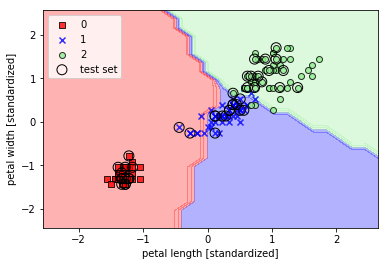

In [25]:
plot_decisions_regions(X=X_combined_std,
                       y =y_combined,
                       classifier=ppn,
                       test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()